In [2]:
import time 
import sys
from blu import *  
# True parameters
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
del data
# posterior samples 
with open('./posterior/img1_det_m1m2xeff.pkl', 'rb') as f:
    img1=dill.load(f)
with open('./posterior/img2_det_m1m2xeff.pkl', 'rb') as f:
    img2=dill.load(f)
# uniform model
with open('./pop_prior/uniform_pop_m1m2xeff.pkl', 'rb') as f:
    pop_uni=dill.load(f)
# HDPGMM models 
with open('./pop_prior/astro_m1m2chieff.pkl', 'rb') as f:
    pop_model=dill.load(f)
# benchmark model
pop_true = mix_pop('./pop_prior/real_dist.pkl')
# power-law model (wrong)
pop_power = mix_pop('./pop_prior/PL_pdf.pkl',wide=True)
N = 5e4
OLU = OddsRatio(gw_pop=pop_model,Nmc=N)
OLU_true = OddsRatio(gw_pop=pop_true,Nmc=N)
OLU_pl = OddsRatio(gw_pop=pop_power,Nmc=N)
OLU_uni = OddsRatio(gw_pop=pop_uni,Nmc=N)

load_data = True 
if load_data:
    data = np.load('blu_data_125_nlog.npz')
    blu_true = data['bt']
    blu_hdpgmm = data['bh']
    blu_pl = data['bp']
    blu_uni = data['bu']

In [3]:
# only compute the blu within the reliable region of reconstructed astro population function
data=np.load(data_dir+'/catalog/m1m2zxeff_posterior_138_lensed.npz')
m1,m2,redshift,xeff = data['m1'],data['m2'],data['redshift'], data['xeff'] 
m1z = m1z=m1*(1+redshift)
m1z = m1z[:int(m1z.size/2)]
index = np.where(m1z<125)[0]

In [7]:
blu_uni=[]
blu_true=[]
blu_hdpgmm=[]
blu_pl=[]
for i in tqdm(index, total = int(index.size), desc = 'BLU-lensed pair'):
    blu_true.append(OLU_true.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_hdpgmm.append(OLU.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_pl.append(OLU_pl.BayesFactor_PEuniform(img1[i],img2[i]))
    blu_uni.append(OLU_uni.BayesFactor_PEuniform(img1[i],img2[i]))
    
blu_true = np.array(blu_true)
blu_hdpgmm = np.array(blu_hdpgmm)
blu_pl = np.array(blu_pl)
blu_uni = np.array(blu_uni)

blu_true = log_blu(blu_true)
blu_hdpgmm = log_blu(blu_hdpgmm)
blu_pl = log_blu(blu_pl)
blu_uni = log_blu(blu_uni)


BLU-lensed pair: 100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [21:51<00:00, 52.45s/it]


Astro Dists: 100%|██████████████████████████| 1000/1000 [01:44<00:00,  9.61it/s]


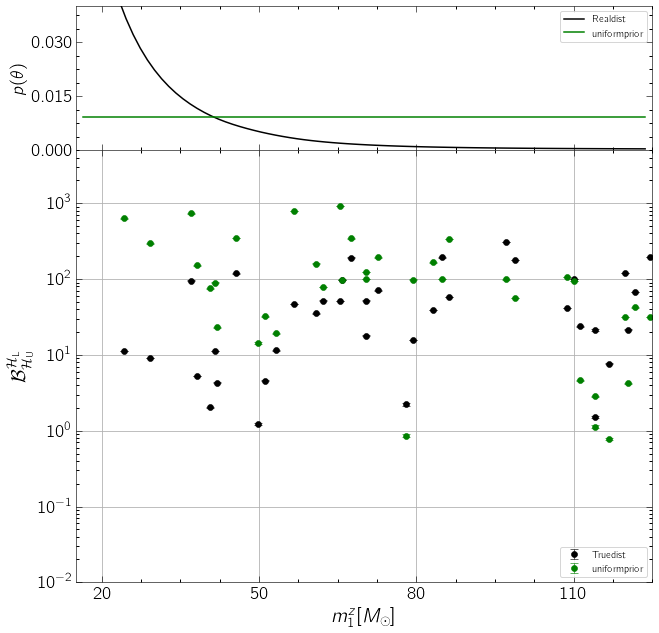

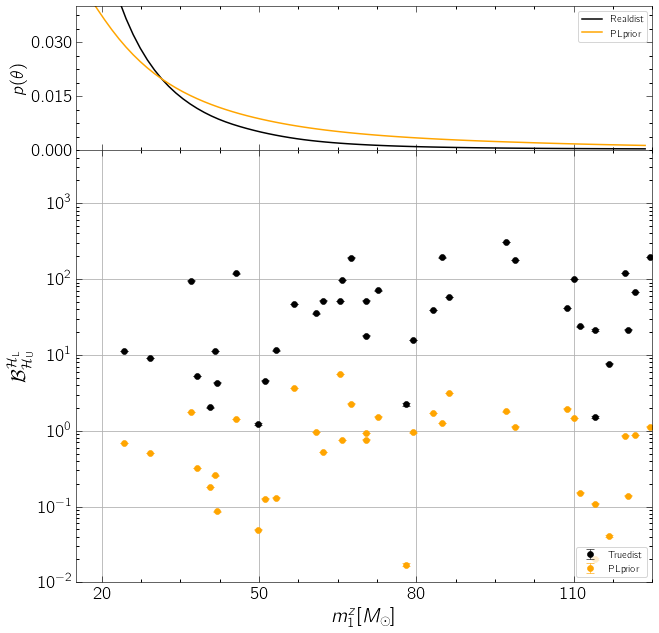

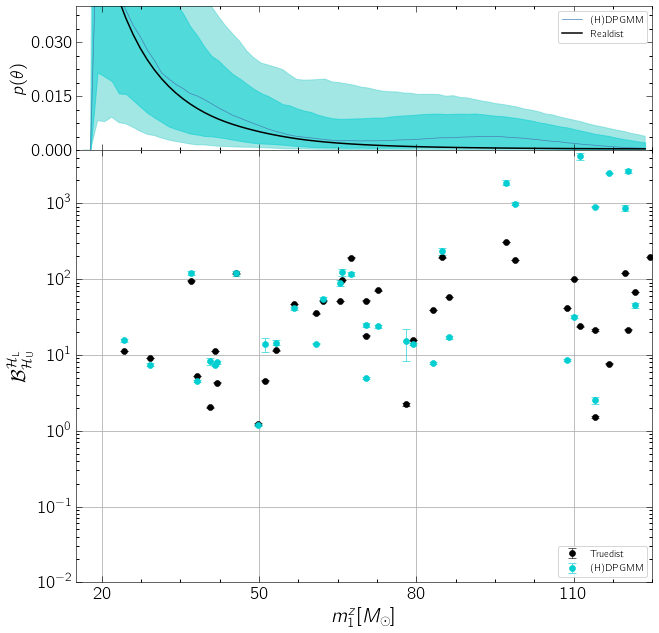

In [4]:
from marginal_plt import *
%matplotlib inline

m1z=m1z[index]
math_blu = '$ \mathcal{B}_{\mathcal{H}_{\mathrm{U}}}^{\mathcal{H}_{\mathrm{L}}}$'

z_bds  = [0.01,1.3]
lim = [15*(1+z_bds[0]), 125]
xlim=lim
ylim=(1e-2,5e3)

n = blu_true.shape[0]
plotting_two(blu_true[:n], blu_uni[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,uni_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_uni_n.pdf',bbox_inches = 'tight')
#ylim=(0,3.1)
plotting_two(blu_true[:n], blu_pl[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,PL_dist=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_pl_n.pdf',bbox_inches = 'tight')
#ylim=(0.5,2.26)
#ylim=(0,5.1)
plotting_two(blu_true[:n], blu_hdpgmm[:n],pop_model,
             pop_true,pop_power, m1z[:n],math_blu,
             real_dist=True,HDPGMM_model=True,xlim=xlim,ylim=ylim,scale_log=True)
plt.savefig('blu_dpgmm_n.pdf',bbox_inches = 'tight')